Modelo Clasificación: Realimentado por los datos de la primera función.

Preprocesamiento de datos

In [78]:
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0
    
    def __eq__(self, value):
        if not isinstance(value, Column):
            return False
        return (
            self.usp_code == value.usp_code and
            self.particle_size == value.particle_size and
            self.temperature == value.temperature and
            self.flowrate == value.flowrate and
            self.t0 == value.t0
        )
    
    def __hash__(self):
        return hash((
            self.usp_code,
            self.particle_size,
            self.temperature,
            self.flowrate,
            self.t0
        ))
    
    def __repr__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"
    def __str__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"


class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna:Column):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

    def __eq__(self, value):
        if not isinstance(value, Config):
            return False
        return (
            self.eluyente1 == value.eluyente1 and
            self.eluyente2 == value.eluyente2 and
            self.ph1 == value.ph1 and
            self.ph2 == value.ph2 and
            self.eluyente_1_gradiente == value.eluyente_1_gradiente and
            self.eluyente_2_gradiente == value.eluyente_2_gradiente and
            self.t_gradiente == value.t_gradiente and
            self.columna == value.columna
        )
    
    def __hash__(self):
        return hash((
            self.eluyente1, 
            self.eluyente2, 
            self.ph1, 
            self.ph2, 
            tuple(self.eluyente_1_gradiente),  
            tuple(self.eluyente_2_gradiente),  
            tuple(self.t_gradiente),           
            self.columna
        ))
        
    def __repr__(self):
        return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")
    
    def __str__(self):
            return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv("../../../data/output_funcion_1_gth_4.csv")

In [81]:
from collections import defaultdict

configs_by_class = defaultdict(set)
classes = df['Clase'].unique()
configs_by_class = {clase: set() for clase in classes}

for i, row in df.iterrows():
    configs_by_class[row["Clase"]].add(
        Config(
            row["Eluyente1"],
            row["Eluyente2"],
            row["pH1"],
            row["pH2"],
            row["Eluyente1 Gradiente"],
            row["Eluyente2 Gradiente"],
            row["T Gradiente"], 
            Column(
                row["Columna Nombre"],
                row["USP Code"],
                row["Longitud"],
                row["Tamaño de Partícula"],
                row["Temperatura"],
                row["Flujo"],
                row["T0"]
            )
        )
    )


In [82]:
from collections import Counter

# Lista con la cantidad de configuraciones por clase
n_configuraciones = [len(configs) for configs in configs_by_class.values()]

# Contar cuántas clases tienen menos de x configuraciones
conteo = {}
total_clases = len(n_configuraciones)  # Total de clases
for limite in range(4, 100): 
    conteo[f"< {limite}"] = sum(1 for n in n_configuraciones if n < limite)

# Mostrar los resultados en formato N/TOTAL
for k, v in conteo.items():
    print(f"Clases con {k} configuraciones: {v}/{total_clases}")



Clases con < 4 configuraciones: 100/137
Clases con < 5 configuraciones: 103/137
Clases con < 6 configuraciones: 104/137
Clases con < 7 configuraciones: 107/137
Clases con < 8 configuraciones: 107/137
Clases con < 9 configuraciones: 109/137
Clases con < 10 configuraciones: 109/137
Clases con < 11 configuraciones: 109/137
Clases con < 12 configuraciones: 109/137
Clases con < 13 configuraciones: 111/137
Clases con < 14 configuraciones: 111/137
Clases con < 15 configuraciones: 111/137
Clases con < 16 configuraciones: 111/137
Clases con < 17 configuraciones: 111/137
Clases con < 18 configuraciones: 111/137
Clases con < 19 configuraciones: 112/137
Clases con < 20 configuraciones: 112/137
Clases con < 21 configuraciones: 113/137
Clases con < 22 configuraciones: 115/137
Clases con < 23 configuraciones: 116/137
Clases con < 24 configuraciones: 119/137
Clases con < 25 configuraciones: 119/137
Clases con < 26 configuraciones: 121/137
Clases con < 27 configuraciones: 121/137
Clases con < 28 config

In [83]:
# Filtrar las clases con más de 9 configuraciones
clases_mayores_a_9 = [clase for clase, configs in configs_by_class.items() if len(configs) > 9]

# Mostrar los nombres de las clases
print(clases_mayores_a_9)


['Benzene and substituted derivatives (CHEMONTID:0002279)', 'Cinnamic acids and derivatives (CHEMONTID:0000476)', 'Organooxygen compounds (CHEMONTID:0000323)', 'Prenol lipids (CHEMONTID:0000259)', 'Carboxylic acids and derivatives (CHEMONTID:0000265)', 'Fatty Acyls (CHEMONTID:0003909)', 'Organonitrogen compounds (CHEMONTID:0000278)', 'Diazines (CHEMONTID:0001346)', 'Imidazopyrimidines (CHEMONTID:0001797)', 'Indoles and derivatives (CHEMONTID:0000211)', 'Purine nucleotides (CHEMONTID:0001506)', 'Keto acids and derivatives (CHEMONTID:0000389)', 'Phenols (CHEMONTID:0000134)', 'Phenol ethers (CHEMONTID:0002341)', 'Hydroxy acids and derivatives (CHEMONTID:0000472)', 'Steroids and steroid derivatives (CHEMONTID:0000258)', 'Lactones (CHEMONTID:0000050)', 'Pteridines and derivatives (CHEMONTID:0000109)', 'Pyridines and derivatives (CHEMONTID:0000089)', 'Pyrimidine nucleosides (CHEMONTID:0000480)', 'Purine nucleosides (CHEMONTID:0000479)', 'Phenylpropanoic acids (CHEMONTID:0002551)', 'Quinoline

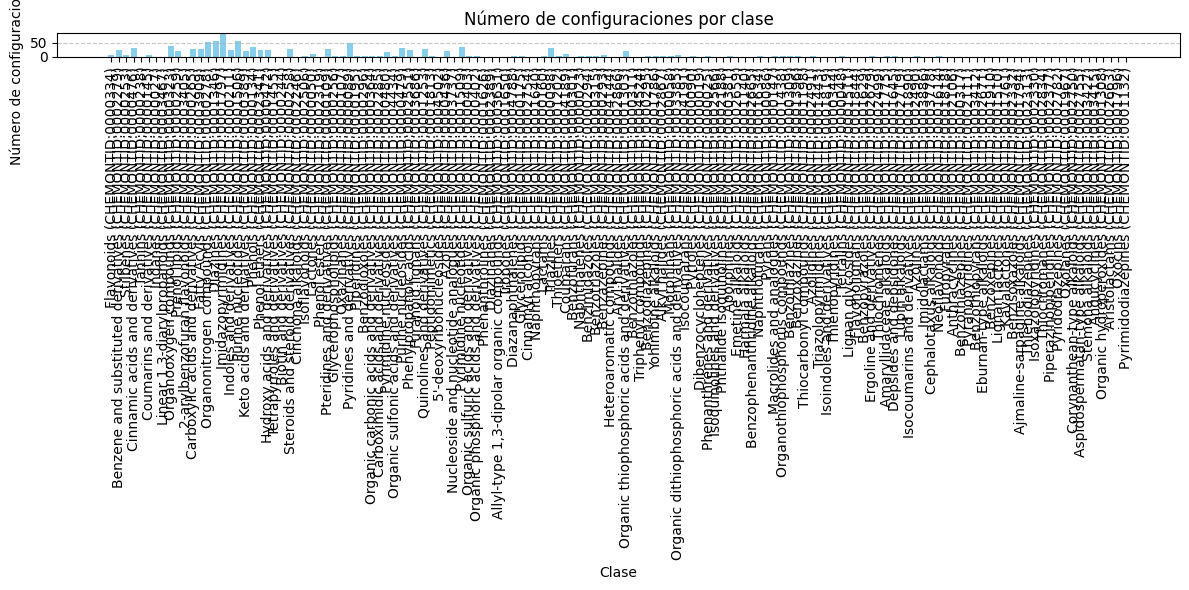

In [84]:
import matplotlib.pyplot as plt

# Preparar los datos
clase_nombres = list(configs_by_class.keys())
n_configuraciones = [len(configs) for configs in configs_by_class.values()]

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(clase_nombres, n_configuraciones, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Clase")
plt.ylabel("Número de configuraciones únicas")
plt.title("Número de configuraciones por clase")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [85]:
#['Benzene and substituted derivatives (CHEMONTID:0002279)', 'Cinnamic acids and derivatives (CHEMONTID:0000476)', 'Organooxygen compounds (CHEMONTID:0000323)', 'Prenol lipids (CHEMONTID:0000259)', 'Carboxylic acids and derivatives (CHEMONTID:0000265)', 'Fatty Acyls (CHEMONTID:0003909)', 'Organonitrogen compounds (CHEMONTID:0000278)', 'Diazines (CHEMONTID:0001346)', 'Imidazopyrimidines (CHEMONTID:0001797)', 'Indoles and derivatives (CHEMONTID:0000211)', 'Purine nucleotides (CHEMONTID:0001506)', 'Keto acids and derivatives (CHEMONTID:0000389)', 'Phenols (CHEMONTID:0000134)', 'Phenol ethers (CHEMONTID:0002341)', 'Hydroxy acids and derivatives (CHEMONTID:0000472)', 'Steroids and steroid derivatives (CHEMONTID:0000258)', 'Lactones (CHEMONTID:0000050)', 'Pteridines and derivatives (CHEMONTID:0000109)', 'Pyridines and derivatives (CHEMONTID:0000089)', 'Pyrimidine nucleosides (CHEMONTID:0000480)', 'Purine nucleosides (CHEMONTID:0000479)', 'Phenylpropanoic acids (CHEMONTID:0002551)', 'Quinolines and derivatives (CHEMONTID:0001253)', 'Azoles (CHEMONTID:0000436)', 'Pyrimidine nucleotides (CHEMONTID:0001509)', 'Triazines (CHEMONTID:0000098)', 'Coumarans (CHEMONTID:0004189)', 'Organic thiophosphoric acids and derivatives (CHEMONTID:0001303)']
df_filtrado = df[df["Clase"].isin(clases_mayores_a_9)]


In [86]:
df_filtrado.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos'],
      dtype='object')

Evaluación de características

In [87]:
# Estadísticas descriptivas para las características numéricas
df_filtrado.describe()

# Contar valores nulos en las columnas
df_filtrado.isnull().sum()

# Contar clases para ver si hay desbalance
df_filtrado['Clase'].value_counts()


Clase
Imidazopyrimidines (CHEMONTID:0001797)                              164
Diazines (CHEMONTID:0001346)                                         90
Purine nucleotides (CHEMONTID:0001506)                               87
Organonitrogen compounds (CHEMONTID:0000278)                         83
Pyridines and derivatives (CHEMONTID:0000089)                        68
Organooxygen compounds (CHEMONTID:0000323)                           51
Triazines (CHEMONTID:0000098)                                        49
Pyrimidine nucleotides (CHEMONTID:0001509)                           46
Purine nucleosides (CHEMONTID:0000479)                               44
Steroids and steroid derivatives (CHEMONTID:0000258)                 43
Pteridines and derivatives (CHEMONTID:0000109)                       43
Phenols (CHEMONTID:0000134)                                          41
Cinnamic acids and derivatives (CHEMONTID:0000476)                   41
Quinolines and derivatives (CHEMONTID:0001253)            

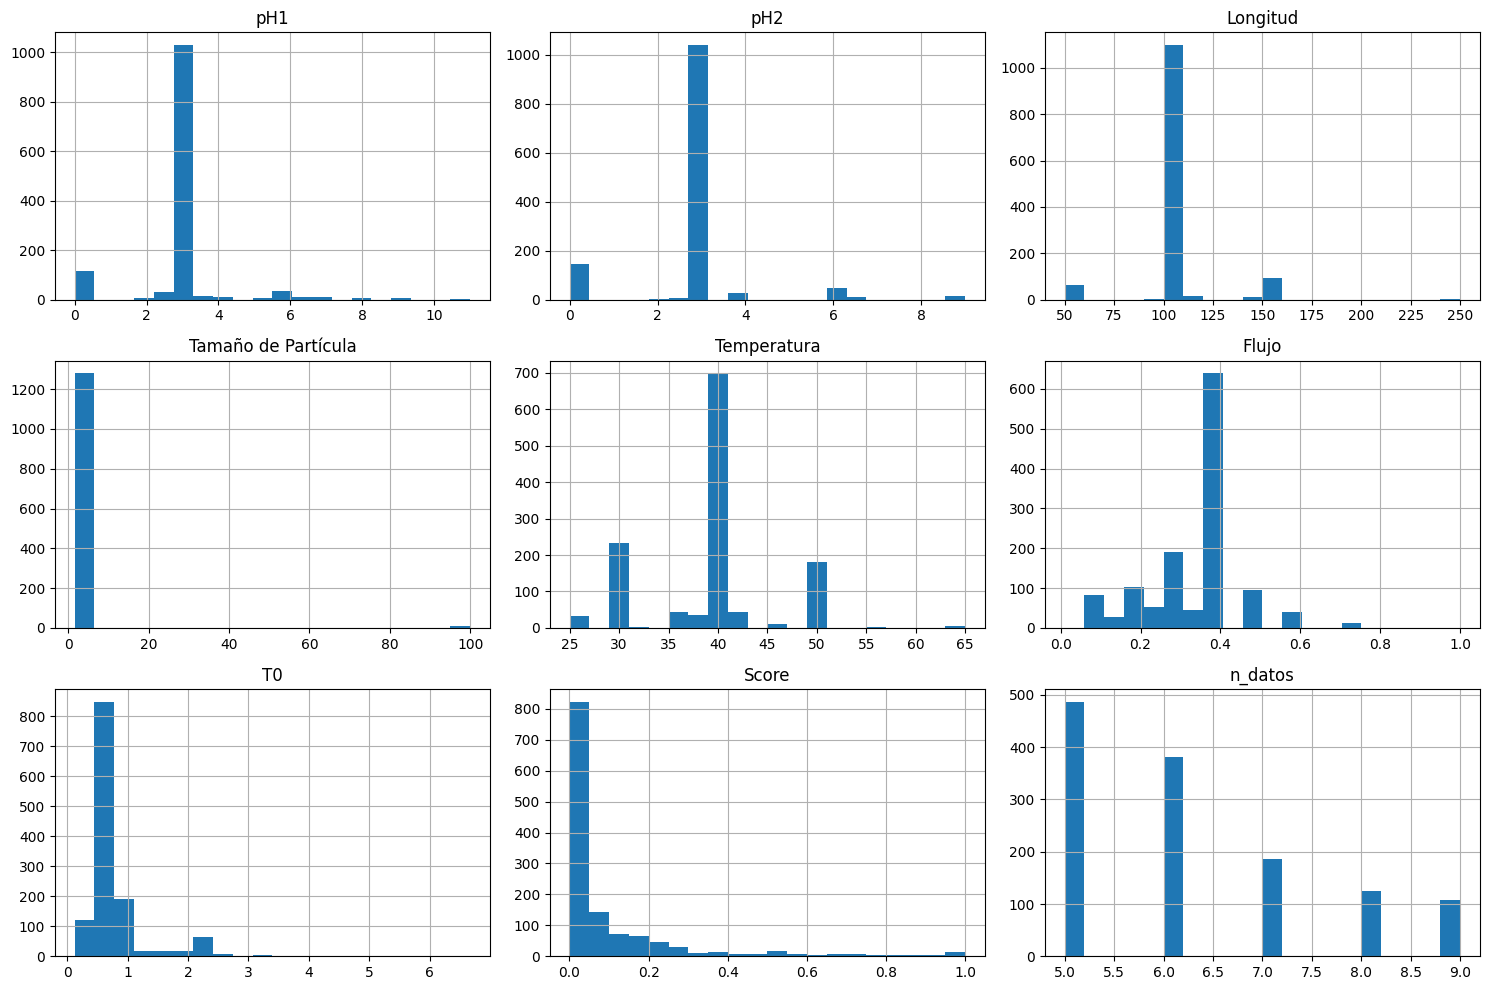

In [88]:
import matplotlib.pyplot as plt

# Graficar histograma de cada característica
#df_filtrado[['Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Columna Nombre', 'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0']].hist(bins=20, figsize=(15, 10))
df_filtrado.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


C:\Users\cmora\AppData\Local\Temp\ipykernel_6772\782623653.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["usp"] = df_filtrado["USP Code"].apply(lambda code: int(reemplazar_usp_code(code)))


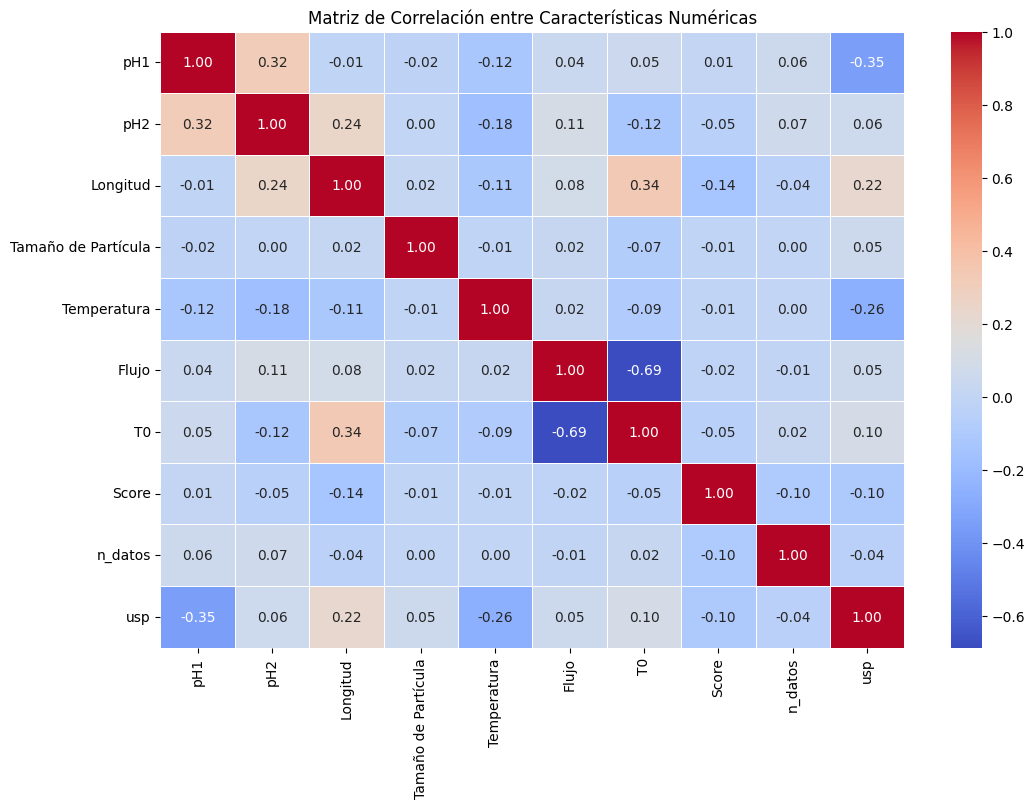

In [89]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para reemplazar el formato "column.usp.code_L1" por "1"
def reemplazar_usp_code(usp_code):
    if usp_code == "column.usp.code_0":
        return 0
    # Reemplazamos con la expresión regular y devolvemos el valor capturado
    return re.sub(r'.*_L(\w+)$', r'\1', usp_code)
    

df_filtrado["usp"] = df_filtrado["USP Code"].apply(lambda code: int(reemplazar_usp_code(code)))

# Asegúrate de seleccionar solo las columnas numéricas del dataframe
df_numerico = df_filtrado.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numerico.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Características Numéricas')
plt.show()


Entrenamiento del modelo 2: (Configuración, Familia) -> (Score)

In [96]:
# Eliminar columnas irrelevantes
df_filtrado = df_filtrado.drop(columns=["n_datos"], errors="ignore")


In [100]:
df_input = df_filtrado[['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score']]

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

# ---------- 1. Funciones de gradiente ----------
def parse_gradient_column(col_str):
    try:
        return np.array([float(v) for v in str(col_str).split(",") if v.strip() != ""])
    except:
        return np.array([0.0])  # En caso de error, devuelve algo neutro

def extract_gradient_features(col_str, prefix):
    values = parse_gradient_column(col_str)
    return {
        f"{prefix}_mean": np.mean(values),
        f"{prefix}_std": np.std(values),
        f"{prefix}_min": np.min(values),
        f"{prefix}_max": np.max(values),
        f"{prefix}_range": np.max(values) - np.min(values),
        f"{prefix}_slope": (values[-1] - values[0]) / len(values) if len(values) > 1 else 0.0
    }

# ---------- 2. Extraer features ----------
def preprocess_dataframe(df):
    # Separar objetivo
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    # Gradiente features
    gradiente_cols = {
        "Eluyente1 Gradiente": "e1g",
        "Eluyente2 Gradiente": "e2g",
        "T Gradiente": "tg"
    }

    gradiente_features = []
    for col, prefix in gradiente_cols.items():
        extracted = X[col].apply(lambda x: extract_gradient_features(x, prefix))
        gradiente_df = pd.DataFrame(list(extracted))
        gradiente_features.append(gradiente_df)

    # Concatenar con otras columnas
    X = X.drop(columns=gradiente_cols.keys()).reset_index(drop=True)

    # Asegurarse de que todos los gradiente_features tengan índices limpios
    gradiente_features = [df.reset_index(drop=True) for df in gradiente_features]

    # Concatenar
    X = pd.concat([X] + gradiente_features, axis=1)

    # Codificación de variables categóricas
    cat_cols = ["Clase", "Columna Nombre", "USP Code", "Eluyente1", "Eluyente2"]
    
    # Aplicar OrdinalEncoder a las columnas categóricas
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 3. Aplicar el pipeline ----------
X_processed, y, encoder = preprocess_dataframe(df_input)

# ---------- 4. Train / Test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ---------- 5. Modelo LightGBM ----------
model = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# ---------- 6. Evaluación ----------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 25
[LightGBM] [Info] Start training from score 0.094956
RMSE: 0.1334


In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor



# ---------- 1. Funciones de gradiente ----------
def parse_gradient_column(col_str):
    try:
        return np.array([float(v) for v in str(col_str).split(",") if v.strip() != ""])
    except:
        return np.array([0.0])  # En caso de error, devuelve algo neutro

def extract_gradient_features(col_str, prefix):
    values = parse_gradient_column(col_str)
    return {
        f"{prefix}_mean": np.mean(values),
        f"{prefix}_std": np.std(values),
        f"{prefix}_min": np.min(values),
        f"{prefix}_max": np.max(values),
        f"{prefix}_range": np.max(values) - np.min(values),
        f"{prefix}_slope": (values[-1] - values[0]) / len(values) if len(values) > 1 else 0.0
    }

# ---------- 2. Extraer features ----------
def preprocess_dataframe(df):
    # Separar objetivo
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    # Gradiente features
    gradiente_cols = {
        "Eluyente1 Gradiente": "e1g",
        "Eluyente2 Gradiente": "e2g",
        "T Gradiente": "tg"
    }

    gradiente_features = []
    for col, prefix in gradiente_cols.items():
        extracted = X[col].apply(lambda x: extract_gradient_features(x, prefix))
        gradiente_df = pd.DataFrame(list(extracted))
        gradiente_features.append(gradiente_df)

    # Concatenar con otras columnas
    X = X.drop(columns=gradiente_cols.keys()).reset_index(drop=True)

    # Asegurarse de que todos los gradiente_features tengan índices limpios
    gradiente_features = [df.reset_index(drop=True) for df in gradiente_features]

    # Concatenar
    X = pd.concat([X] + gradiente_features, axis=1)

    # Codificación de variables categóricas
    cat_cols = ["Clase", "Columna Nombre", "USP Code", "Eluyente1", "Eluyente2"]
    
    # Aplicar OrdinalEncoder a las columnas categóricas
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 3. Aplicar el pipeline ----------
X_processed, y, encoder = preprocess_dataframe(df_input)

# ---------- 4. Train / Test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)






In [105]:
# ---------- 5. Modelo LightGBM ----------
model = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# ---------- 6. Evaluación ----------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 25
[LightGBM] [Info] Start training from score 0.094956
RMSE: 0.1334


In [115]:
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Imputar los valores faltantes con la media (puedes cambiar 'mean' por 'median' o 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Imputamos tanto X_train como X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Crear y entrenar el modelo de red neuronal
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
mlp_model.fit(X_train_imputed, y_train)

# Evaluación del modelo
y_pred_mlp = mlp_model.predict(X_test_imputed)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"RMSE (MLP): {rmse_mlp:.4f}")



RMSE (MLP): 0.3120


In [107]:
# ---------- 8. Modelo Random Forest Regressor ----------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación del modelo
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE (Random Forest): {rmse_rf:.4f}")

RMSE (Random Forest): 0.1205


In [ ]:
def predecir_score(config, clase, model, encoder):
    def extraer_features_gradiente(grad_str, prefix):
        values = [float(v.strip()) for v in grad_str.split(",") if v.strip()]
        arr = np.array(values, dtype=np.float32)
        return {
            f"{prefix}_mean": np.mean(arr),
            f"{prefix}_std": np.std(arr),
            f"{prefix}_min": np.min(arr),
            f"{prefix}_max": np.max(arr),
            f"{prefix}_range": np.max(arr) - np.min(arr),
            f"{prefix}_slope": (arr[-1] - arr[0]) / len(arr) if len(arr) > 1 else 0.0
        }

    # Construir el diccionario de entrada como en df_filter
    data = {
        "Clase": clase,
        "Eluyente1": config.eluyente1,
        "Eluyente2": config.eluyente2,
        "pH1": config.ph1,
        "pH2": config.ph2,
        "Columna Nombre": config.columna.name,
        "USP Code": config.columna.usp_code,
        "Longitud": config.columna.length,
        "Tamaño de Partícula": config.columna.particle_size,
        "Temperatura": config.columna.temperature,
        "Flujo": config.columna.flowrate,
        "T0": config.columna.t0,
    }

    # Agregar features de los gradientes
    data.update(extraer_features_gradiente(config.eluyente_1_gradiente, "e1g"))
    data.update(extraer_features_gradiente(config.eluyente_2_gradiente, "e2g"))
    data.update(extraer_features_gradiente(config.t_gradiente, "tg"))

    df_pred = pd.DataFrame([data])

    # Codificación categórica (orden y columnas iguales a entrenamiento)
    cat_cols = ["Clase", "Columna Nombre", "USP Code", "Eluyente1", "Eluyente2"]
    df_pred[cat_cols] = encoder.transform(df_pred[cat_cols])

    # Predecir
    prediction = model.predict(df_pred)[0]
    return prediction


In [ ]:
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
configuraciones = df_filtrado.apply(create_config, axis=1)

In [ ]:
def buscar_clase_con_score_maximo(configuraciones, df):
    """Busca la clase con el Score más alto para cada configuración en el DataFrame.
    Devuelve una lista de tuplas (config, clase, score_maximo).
    """
    resultados = []
    
    for config in configuraciones:
        # Filtrar el DataFrame para las filas que coincidan con la configuración
        filtro = (
            (df['Eluyente1'] == config.eluyente1) &
            (df['Eluyente2'] == config.eluyente2) &
            (df['pH1'] == config.ph1) &
            (df['pH2'] == config.ph2) &
            (df['Eluyente1 Gradiente'] == config.eluyente_1_gradiente) &
            (df['Eluyente2 Gradiente'] == config.eluyente_2_gradiente) &
            (df['T Gradiente'] == config.t_gradiente) &
            (df['Longitud'] == config.columna.length) &
            (df['Tamaño de Partícula'] == config.columna.particle_size) &
            (df['Temperatura'] == config.columna.temperature) &
            (df['Flujo'] == config.columna.flowrate) &
            (df['T0'] == config.columna.t0)
        )
        
        df_filtrado = df[filtro]
        
        if not df_filtrado.empty:
            fila_max_score = df_filtrado.loc[df_filtrado['Score'].idxmax()]
            clase = fila_max_score['Clase']
            score_maximo = fila_max_score['Score']
        else:
            clase = None
            score_maximo = None
        
        resultados.append((config, clase, score_maximo))
    
    return resultados


In [ ]:
config_clase_score = buscar_clase_con_score_maximo(configuraciones=configuraciones, df=df_filtrado)


In [103]:
predecir_score(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
     model,
     encoder) #0.6753313746134468, en la realidad es 1.0

0.6753313746134468

In [ ]:
predecir_score(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
    mlp_model,
    encoder)

c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


0.6344962536950708

In [108]:
predecir_score(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
     rf_model,
     encoder)

0.8487560556654039

In [21]:
config_clase_score

[(Config(eluyente1=eluent.1.h2o 0, eluyente2=eluent.2.acn 0, ph1=3.0, ph2=3.0, eluyente_1_gradiente=95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, eluyente_2_gradiente=5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, t_gradiente=0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, columna=Column(name=Agilent ZORBAX Extend-C18, usp_code=column.usp.code_L1, length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
  'Benzene and substituted derivatives (CHEMONTID:0002279)',
  1.0),
 (Config(eluyente1=eluent.1.h2o 0, eluyente2=eluent.2.meoh 0, ph1=3.61, ph2=3.61, eluyente_1_gradiente=99.0, 99.0, 61.0, 0.01, 0.01, 99.0, 99.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, eluyente_2_gradiente=1.0, 1.0, 39.0, 99.9, 99.9, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, t_gradiente=0.0, 1.0, 2.0, 13.0, 15.0, 15.1, 20.1, 

In [22]:
diff = []
for config, clase, score_real in config_clase_score:
    if isinstance(clase, pd.Series):
        clase = clase.iloc[0]
    if isinstance(score_real, pd.Series):
        score_real = score_real.iloc[0]  # O .mean(), o max(), dependiendo de tu lógica

    if score_real is not None and clase is not None:
        score_predicho = predecir_score(config, clase, model, encoder)
        diferencia = score_real - score_predicho
        diff.append(diferencia)
    else:
        diff.append(None)





In [23]:
diff

[0.32466862538655317,
 0.33841123374800375,
 0.49704008159182156,
 0.12872206722415586,
 0.041366594863203265,
 0.041366594863203265,
 0.11869936967181449,
 0.11869936967181449,
 0.41191379183568144,
 0.47729528141729954,
 0.5800597993047694,
 0.22819257968584772,
 0.9094966279373926,
 0.24940040709353584,
 0.6547536691062592,
 -0.0008624576250030724,
 0.09561766802667404,
 0.5994527114635719,
 0.36479479169209583,
 0.060381389098495164,
 0.03262746508472336,
 0.07423952372095871,
 0.0538163168020038,
 0.06897152036503362,
 0.24940040709353584,
 0.256055231430122,
 -0.0260016414099061,
 0.5800597993047694,
 0.025845999297191058,
 0.09561766802667404,
 0.041366594863203265,
 0.031011916297639358,
 -0.09476352669230886,
 -0.06880273020053426,
 0.32466862538655317,
 0.020185994163232364,
 0.053001824099976766,
 0.11869936967181449,
 0.053001824099976766,
 0.11869936967181449,
 0.056896383113505894,
 -0.09476352669230886,
 0.11737036270288193,
 -0.034325360788789186,
 0.02272535212130909,
